In [2]:
from src import util
from datetime import datetime
from tqdm import tqdm

di = util.DataIter()

ITEM_COUNT = 4068608

repost_count = 0 
min_dt = datetime(2999, 10, 10)
max_dt = datetime(1999, 10, 10)
dd = {}

with tqdm(total=ITEM_COUNT) as pbar:
    for i in di:
        # 统计转发数
        if 'repost' in i:
            repost_count += 1

        # 统计开始结束时间
        dt = util.tranformDate(i["timestamp"])
        if dt>max_dt:
            max_dt = dt
        elif dt<min_dt:
            min_dt = dt
        if dt.date() in dd:
            dd[dt.date()] += 1
        else:
            dd[dt.date()] = 1
        
        pbar.update(1)

print("转发消息占比:", repost_count/di.cur_sum_)
print(f"开始时间:{min_dt},结束时间:{max_dt}")

100%|██████████| 4068608/4068608 [01:10<00:00, 57357.20it/s] 

转发消息占比: 0.42993205538601903
开始时间:2019-01-19 00:08:00,结束时间:2020-03-27 23:00:00


In [ ]:
import pickle

with open('asset/dd.pkl') as f:
    pickle.dump(dd, f)

2019-12-08


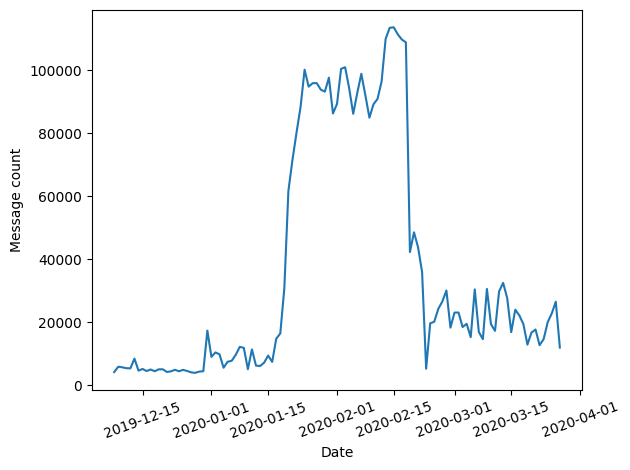

In [22]:
import matplotlib.pyplot as plt

X_ori = sorted(dd.keys())
X = [x for x in X_ori if dd[x]>2000]
y = [dd[x] for x in X]

print(X[0])

plt.plot(X, y)
plt.xticks(rotation=20)
plt.xlabel('Date')
plt.ylabel('Message count')
plt.tight_layout()
plt.savefig('asset/msg.svg', dpi=300)